# Popularity Prediction Analysis

## Introduction

Music plays a significant role in my life, sparking a deep interest in understanding the factors that contribute to a song's success. This project leverages data analysis to explore the characteristics that drive song popularity across major streaming platforms. By combining my passion for music with data science, I aim to uncover insights that could be valuable for artists, producers, and music enthusiasts alike. This project aims to explore what factors (bpm, danceability, positivity, instrumentalness, speechiness) affect the number of streams a song gets.

In [1]:
# installing dependencies
import kaggle
import pandas as pd
# for EDA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kaggle.api.authenticate()

# download the dataset
kaggle.api.dataset_download_files('nelgiriyewithana/top-spotify-songs-2023', path = ".", unzip = True)

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


In [3]:
csv = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
csv.to_csv('spotify-2023-utf8.csv', encoding='utf-8', index=False)

data = pd.read_csv('spotify-2023-utf8.csv')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# total: 953 observations and 24 columns
data.shape

(953, 24)

In [5]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Wrangling the dataset

The dataset is wrangled to the desired foramt for this project. \
Selected variables are \
Exploratory variables: `bpm`, `danceability_%`, `valence_%`, `instrumentalness_%`, and `speechiness_%`\
Response variable: `streams`\
Due to large values in the `streams` column, I've applied a log transformation to better visualize visualization. This can help make it easier to see patterns in the data by compressing large values.

In [6]:
music = data[['streams', 'bpm', 'danceability_%', 'valence_%', 'instrumentalness_%', 'speechiness_%']]
music.head(3)

,streams,bpm,danceability_%,valence_%,instrumentalness_%,speechiness_%
0,141381703,125,80,89,0,4
1,133716286,92,71,61,0,4
2,140003974,138,51,32,0,6


In [10]:
# check if there are null values
music.isnull().sum()

streams               0
bpm                   0
danceability_%        0
valence_%             0
instrumentalness_%    0
speechiness_%         0
dtype: int64

In [11]:
music.dtypes

streams               object
bpm                    int64
danceability_%         int64
valence_%              int64
instrumentalness_%     int64
speechiness_%          int64
dtype: object

The `streams` column is of type `object`, but it needs to be treated as a numeric data type, so it was converted to a numeric type.

In [ ]:
# music["streams"] = 

# check the type again

In [12]:
music["stream_million"] = music["streams"] / 1e6
# music.head()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

### Exploratory Data Analysis

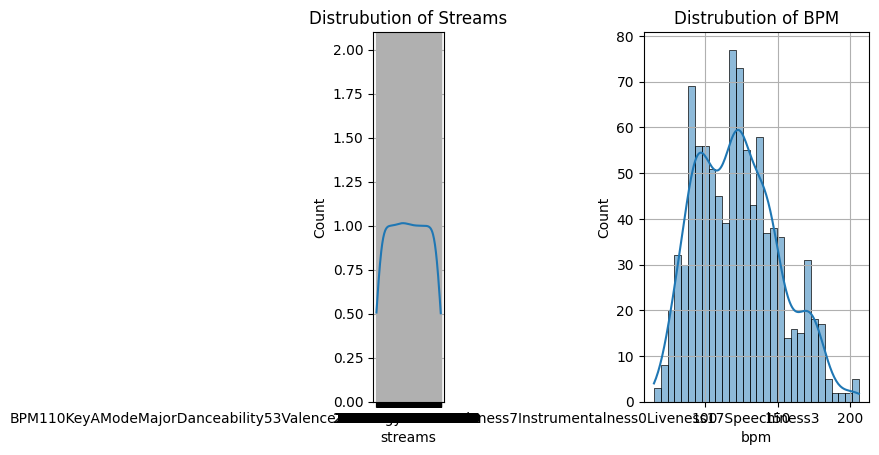

In [ ]:
plt.subplot(1, 6, 1) # row 1, col 6, index 1
sns.histplot(music["streams"], kde=True)
plt.title("Distrubution of Streams")
# plt.xlabel("Streams")
plt.grid(True)


plt.subplot(1, 2, 2) # row 1, col 6, index 2
sns.histplot(music["bpm"], bins = 30, kde=True)
plt.title("Distrubution of BPM")
# plt.xlabel("BPM")
plt.grid(True)
plt.show()


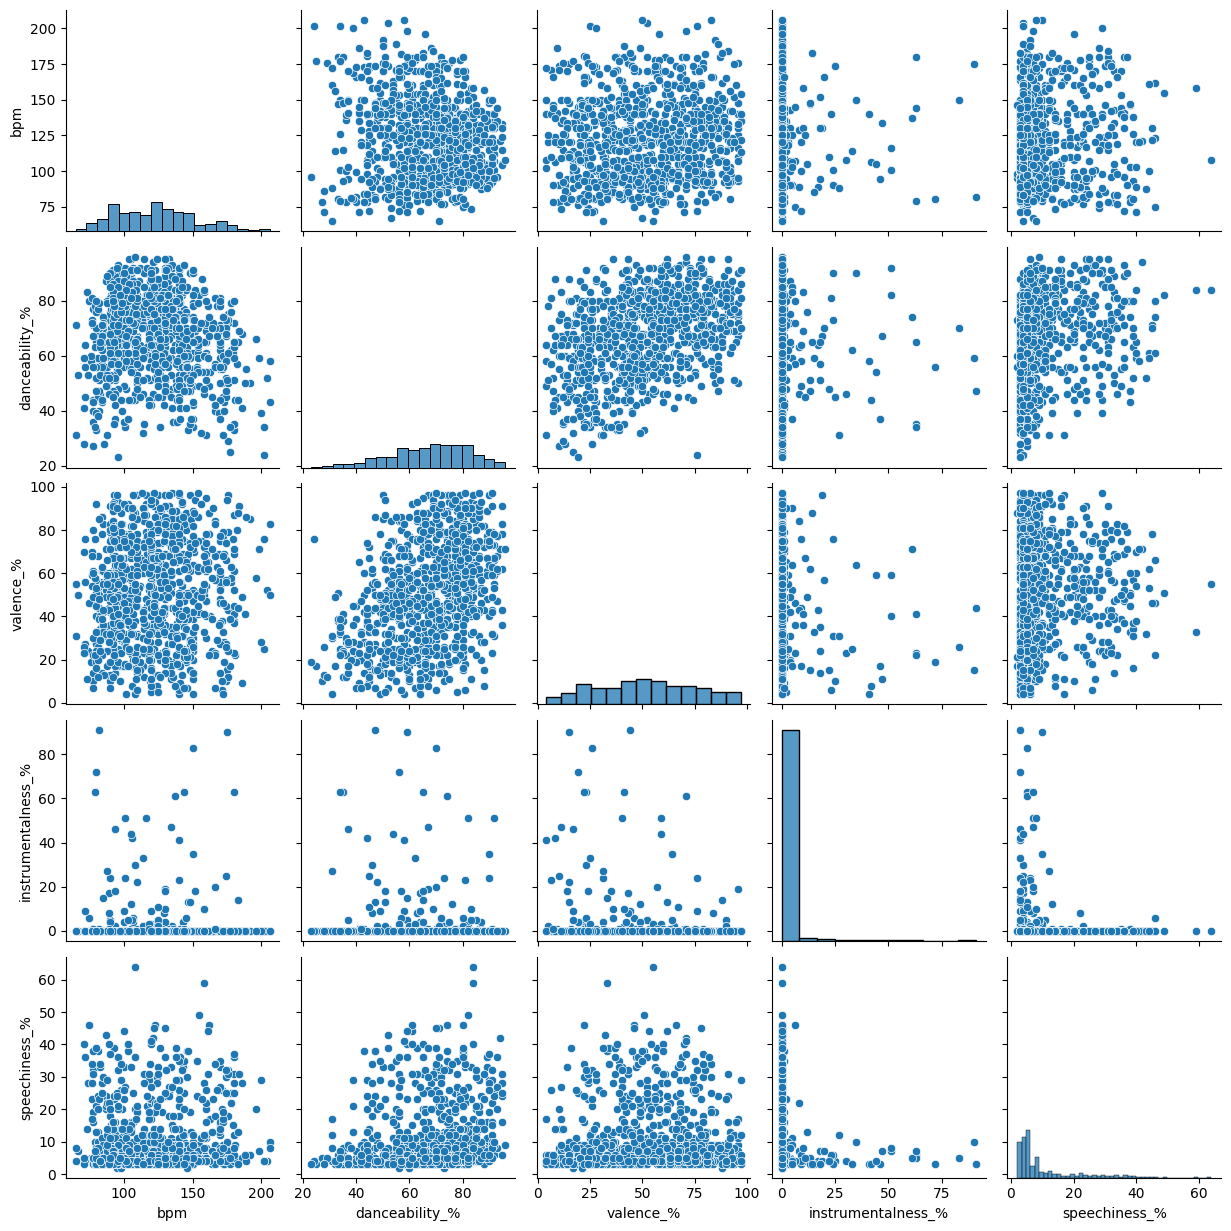

In [ ]:
sns.pairplot(music)
plt.show()

In [ ]:
# data analysis


# build predictive model
# populatiry prediction model

# validate model
